/var/folders/jj/9j0c_6196zx24tx5jb3ngnym0000gn/T/ipykernel_13238/2229719981.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="1993-04-01")
[*********************100%***********************]  1 of 1 completed


NameError: name 'BB_LEN' is not defined

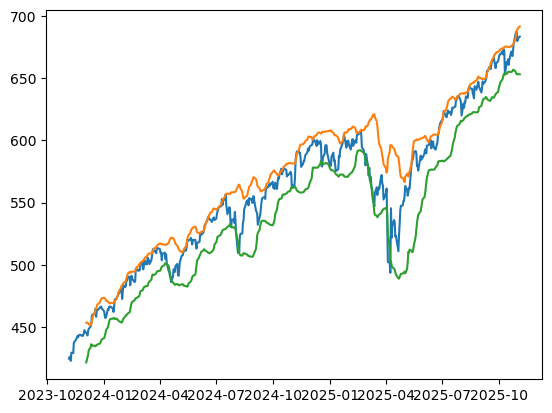

In [16]:
## Strategy based on the Standard Deviation of Close Prices over a Lookback Window

import yfinance as yf
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt

TICKER = "SPY"
BB_LENGTH = 20
STD_DEV = 2 # Default for Bollinger Bands
LOOKBACK = 500

def get_data(ticker=TICKER):
    df = yf.download(ticker, start="1993-04-01")
    df.columns = df.columns.get_level_values(0)

    return df.iloc[-LOOKBACK:,:]

def add_bollinger_bands(df, std_dev = STD_DEV, length = BB_LENGTH):
        # Step 1: Build the BB Columns
    df["BB_SMA"] = df["Close"].rolling(window=length).mean()
    df["BB_STD"] = df["Close"].rolling(window=length).std()
    df["Upper Band"] = df["BB_SMA"] + (std_dev * df["BB_STD"])
    df["Lower Band"] = df["BB_SMA"] - (std_dev * df["BB_STD"])
    # In Coding Practice, you are not supposed to create a New Column for every value you want to see
    # but in this video, it is pretty valuable. It is tho slower, larger and this is not optimal
        
        # Step 2: Plot the BB
    plt.figure()
    plt.plot(df["Close"]) # Blue
    plt.plot(df["Upper Band"]) # Orange
    plt.plot(df["Lower Band"]) # Green
    plt.title(f"{TICKER} Bollinger Bands. Len: {BB_LEN}. Deviation: {STD_DEV}")

    return df.dropna()
    # Drop na, since it takes us 20 days to get the first rollings average values 

def main():
    df = get_data()
    df = add_bollinger_bands(df)

    return df

df = main()

In [ ]:
df

Price,Close,High,Low,Open,Volume,BB_SMA,BB_STD,Upper Band,Lower Band
Date,,,,,,,,,
2021-12-07,442.708679,443.275921,433.604539,439.050013,95484700,438.578746,5.637761,449.854267,427.303225
2021-12-08,443.880981,444.334781,441.337872,443.105781,72238800,438.679903,5.717283,450.114468,427.245337
2021-12-09,440.884033,443.984921,440.685509,442.585729,61272600,438.808946,5.737422,450.283791,427.334101
2021-12-10,445.034332,445.185599,441.035338,443.606808,77159800,439.138414,5.902249,450.942912,427.333916
2021-12-13,441.092102,444.864212,440.808467,444.514421,87724700,439.105330,5.888656,450.882642,427.328018
...,...,...,...,...,...,...,...,...,...
2025-10-28,687.059998,688.909973,684.830017,687.049988,61738100,669.603494,7.751315,685.106125,654.100864
2025-10-29,687.390015,689.700012,682.869995,688.719971,85657100,670.550494,8.701689,687.953872,653.147116
2025-10-30,679.830017,685.940002,679.830017,683.900024,76335800,671.080997,8.936557,688.954111,653.207882
